# BPL IEC validation

Author: Jan Peter Axelsson

Here I try to reproduce somre results from Jonas Månssons master thesis report "Control of chromatography comlumn in production scale", TFRT-5599.

The interaction withe the model has changed slightly so that linear flow rate LF = F/area is used. The column volume is now specified in terms of (cross-section) area times height. Thus by changing area the scale up works fine and what you do in practice. Further the time unit changed from seconds to minutes.

The model has 5 states as listed below, 3 states in liquid mobile phase and 2 states for the gel for bound proteins. In a few of Jonas figures also bound ions of the buffer are plotted but I do not do that. Bound ions of the buffer can be calculated from the difference of total binding capaciety $Q_{av}$ and bound protein and bound protein antagonist, see section 5.1 in the report.

The molecular weights listed below are not used in the simulations. They just give typical values and the molecular weight for bound protein and antagonist protein is just arbitrary here.

Parameters of the model in general as well as time scale are all arbitrary and focus is on qualitative aspects of the model.

The height of the column is 20 cm which is a common size in the industry.

In [1]:
run -i BPL_IEC_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
 plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

In [3]:
describe('chromatography'); print(); describe('liquidphase')

Ion exchange chromatorgraphy controlled with varying salt-concentration. The pH is kept constant.

Chromatography liquidphase (or mobilephase) substances included in the model

Protein                  - index =  1 - molecular weight =  22000.0 Da
Antagonist protein       - index =  2 - molecular weight =  15000.0 Da
Ion                      - index =  3 - molecular weight =  58.4 Da
Protein bound            - index =  4 - molecular weight =  100000.0 Da
Antagonist protein bound - index =  5 - molecular weight =  100000.0 Da

Note that both proteins P and A as well as the salt-ion E is modelled to the same mobile phase volume.


## Loading or adsorption

The parameter notation and values are the same as in the referred report. However the flow rate is here denoted F while q in the report. The column is diveded in n=8 sections and set at compilation time. The values are arbitrarly chosen in the report and the focus is on qualitative aspects of the model.

The simplified model describe only the column in terms of volume and does not distinguish a high column with a small diameter from a lower with larger diameter.

The parameters k1, k2, k3, k4 and Q_av are given relative volume and with increased column volume a larger capacity is thus obtained.

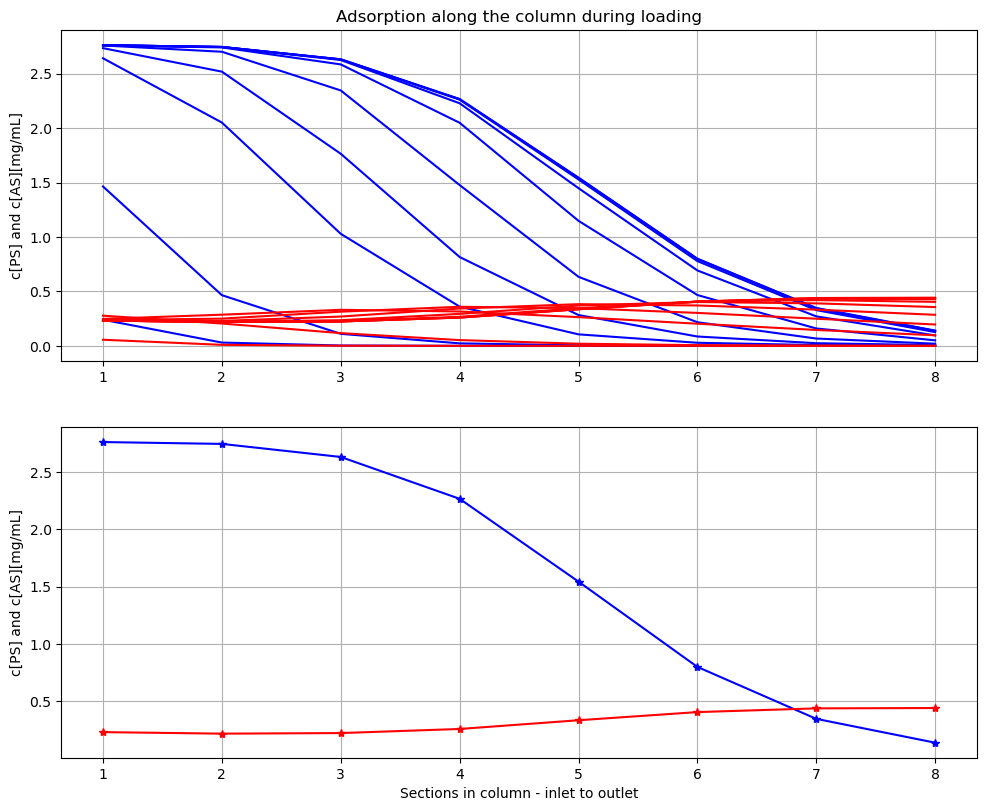

In [4]:
# Loading of the column - try to reproduce Jonas figure 13.
newplot(title='Adsorption along the column during loading', plotType='Loading') 

# Sample
par(P_in=1.0, A_in=1.0, E_in=0)

# Column properties 
par(k1=0.3, k2=0.05, k3=0.05, k4=0.3, Q_av=3.0)
par(height=20, diameter=0.714)
par(x_m=0.3)

# Operation
par(E_in_desorption_buffer=8)
par(LFR=12)
par(scale_volume=False) 
par(start_adsorption=0, stop_adsorption=50)
par(start_desorption=150, stationary_desorption=450)
par(start_pooling=220, stop_pooling=450)

# Simulation
simu(100)

Looks like Figure 13 in Jonas report!

In [5]:
# We just check that we had the same volume flow rate as Jonas
describe('F')

Column volumetric flow rate : 0.08 [ mL/min ]


In [6]:
describe('V')

Column volume total - derived : 8.008 [ mL ]


In [7]:
model.get('column.x_m')

array([0.3])

In [8]:
model.get('column.V_m')

array([2.40235705])

In [9]:
describe('column.n')

Number of sections of the column : 8


In [10]:
model.get('column.column_section[1].V_m')

array([0.30029463])

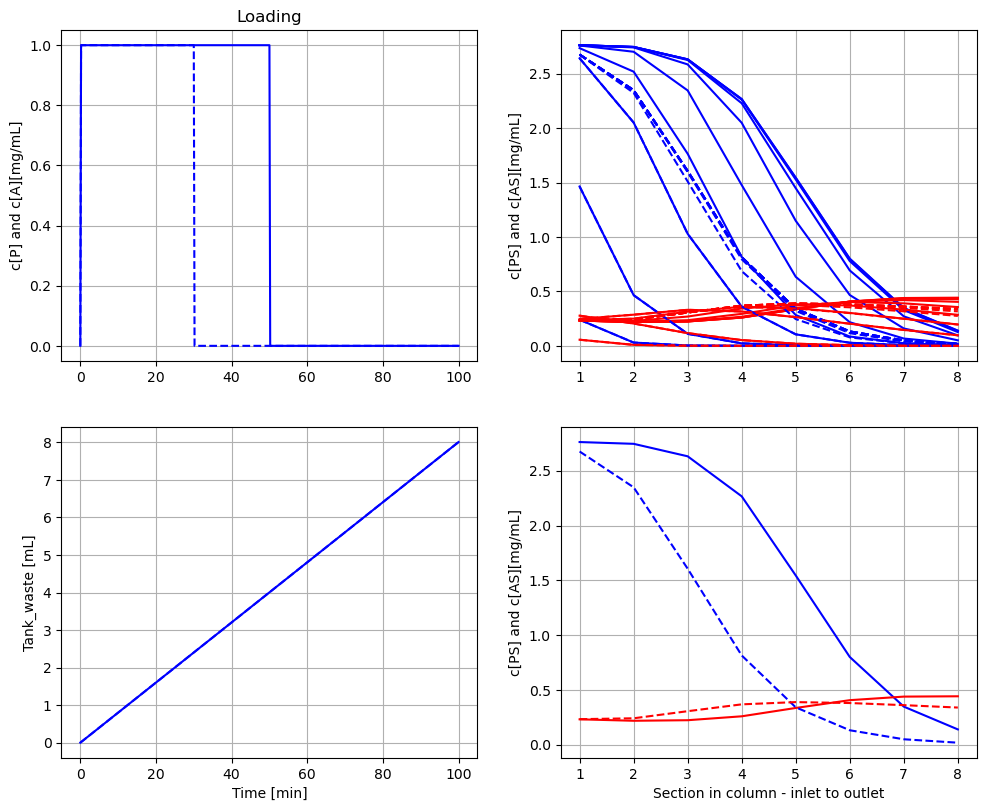

In [11]:
# Impact of shorter time for loading and then less material
newplot(title='Loading', plotType='Loading-combined')
show()

# Simulation with changed parameter t2
par(stop_adsorption=30); simu(100)

# Reset changed parameter
par(stop_adsorption=50)

To the left the inlet loading over time. 
To the right upper concentration along the column at different times and in steady states finally
To the right lower concentrations along the colunn in steady state.

We see that a shorter time and then less material makes less of the column capacity used.

Note that the flow through the column is constant despite change from sample to just buffer 1, and shown in how the volume of the waste tank increase with time.

## Elution or desorption

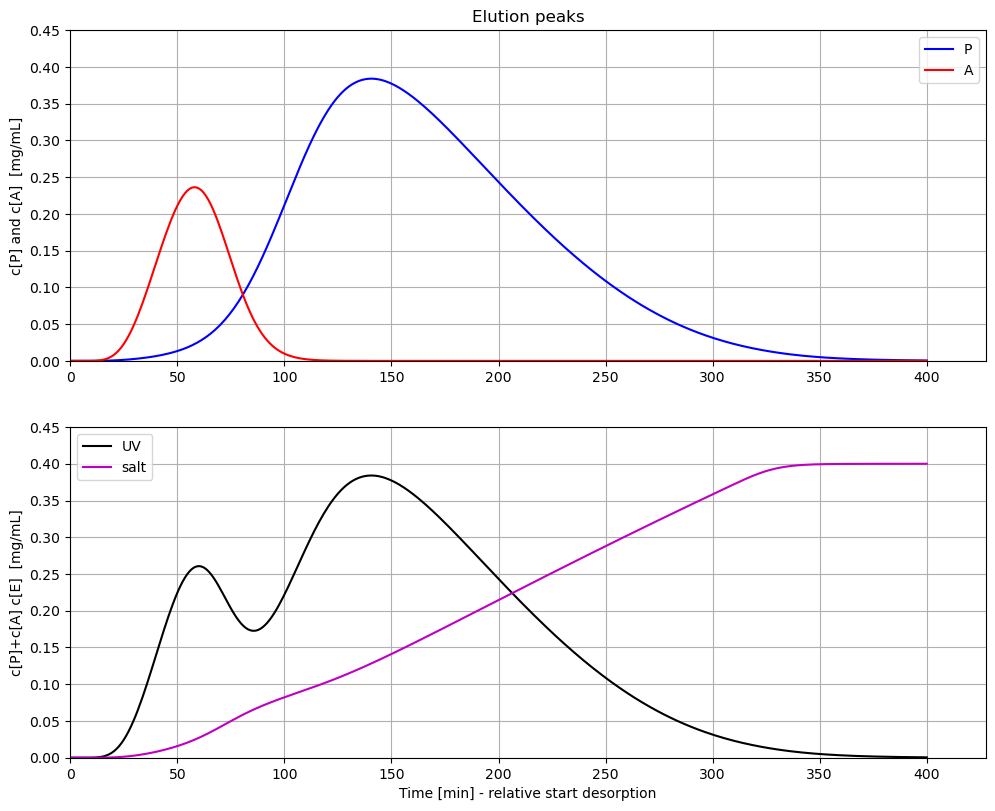

In [12]:
# Elution of the column
newplot(title='Elution peaks', plotType='Elution')

# Sample
par(P_in=1, A_in=1.0, E_in=0)

# Operation
par(E_in_desorption_buffer=8)
par(LFR=12.0, start_adsorption=0, stop_adsorption=50, start_desorption=150, stationary_desorption=450)

# Simulation
simu(550)

Very close to Jonas Figure 14! 

The upper diagrams shows the column outlet concentrations of P and A over time.

The lower diagram shows the sum (or possibly the UV signal) at column outlet as well as the salt concentration. We have some separation between the two peaks.

Note that the salt concentration deviates slightly from the linear increse between time 50 to 100. This is due to ion interaction with P and A in the column. The ion-salt concentration is scaled with factor 0.05 to get comparable concentrations to P and A.

I have here simulated time 150 of adsorbtion and then started elution. Here is time counted as zero at time of start of elutions. Not sure how long Jonas simulated to get steady state before he did elution.

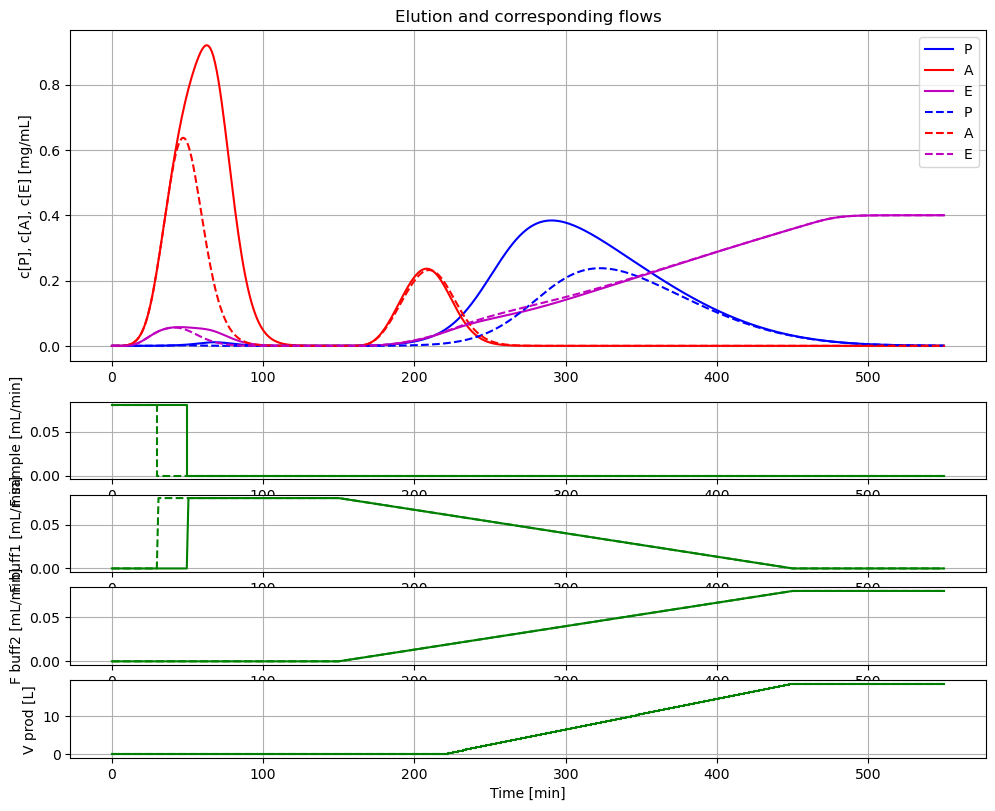

In [17]:
# More complete visualization of the elution phase and the different flows
newplot(title='Elution and corresponding flows', plotType='Elution-combined')
par(stop_adsorption=50); simu(550)

# Simulation with changed parameter t2
par(stop_adsorption=30); simu(550)

# Reset changed parameter
par(stop_adsorption=50)

Here a diagram that shows the peaks at the outlet as shown in the previous diagram. Below the flow rates of the three differnet sorces. Here time is 0 at start of adsorbtion and elution starts at time 150.

All material goes at the end to the waste tank. Automatic pooling to a product tank is not implemented yet.

The comparison with a smaller loading and no effect on the P and A peaks confuse me.

## Acknowledgement

The author thank Karl Johan Brink for sharing his know-how of chromatography operation. 
He has especially given input to how to parametrize the model in terms often used in the industrial practice.

## References

1) Månsson, Jonas, "Control of chromatography comlumn in production scale", Master thesis TFRT-5599, Department of Automatic Control, LTH, Lund Sweden, 1998.

2) Pharmacia LKB Biotechnology. "Ion Exchange chromatography. Principles and Mathods.", 3rd edition, 1991.

## Appendix

In [14]:
describe('MSL')

MSL: RealInput, RealOutput, Constants, Hysteresis, CombiTimeTable, Types


In [15]:
system_info()


System information
 -OS: Windows
 -Python: 3.10.6
 -Scipy: not installed in the notebook
 -PyFMI: 2.10.0
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_IEC.Column_system
 -Generated: 2023-04-21T12:28:38
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore version 0.9.7
